## Diabetes Prediction Model

#### Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from pandas.plotting import scatter_matrix

#### Data collection and analysis

In [3]:
diabetes_dataset=pd.read_csv('diabetes.csv')
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

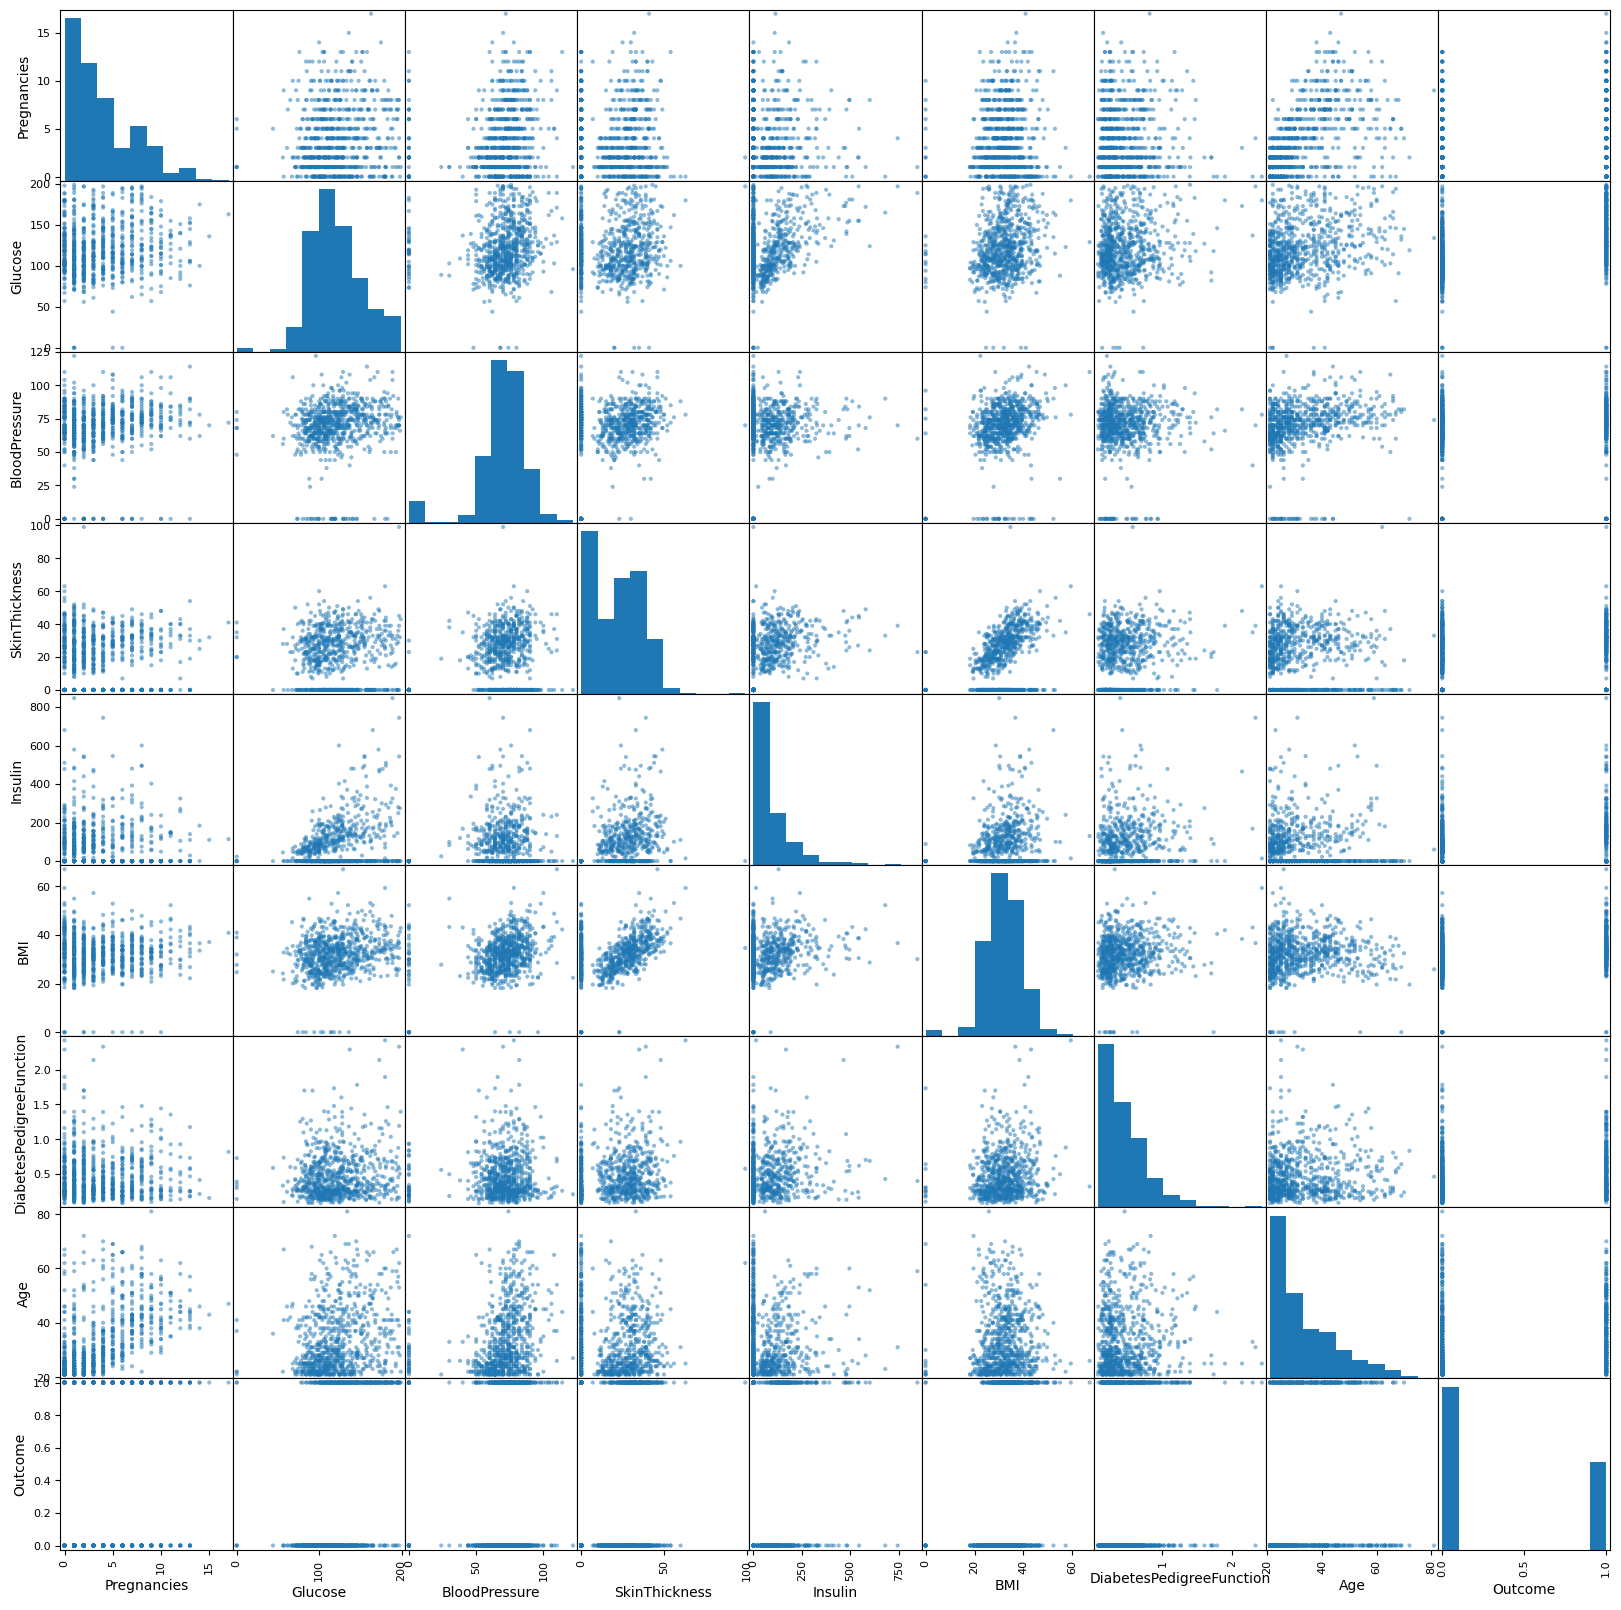

In [8]:
scatter_matrix(diabetes_dataset,figsize=(20,20));

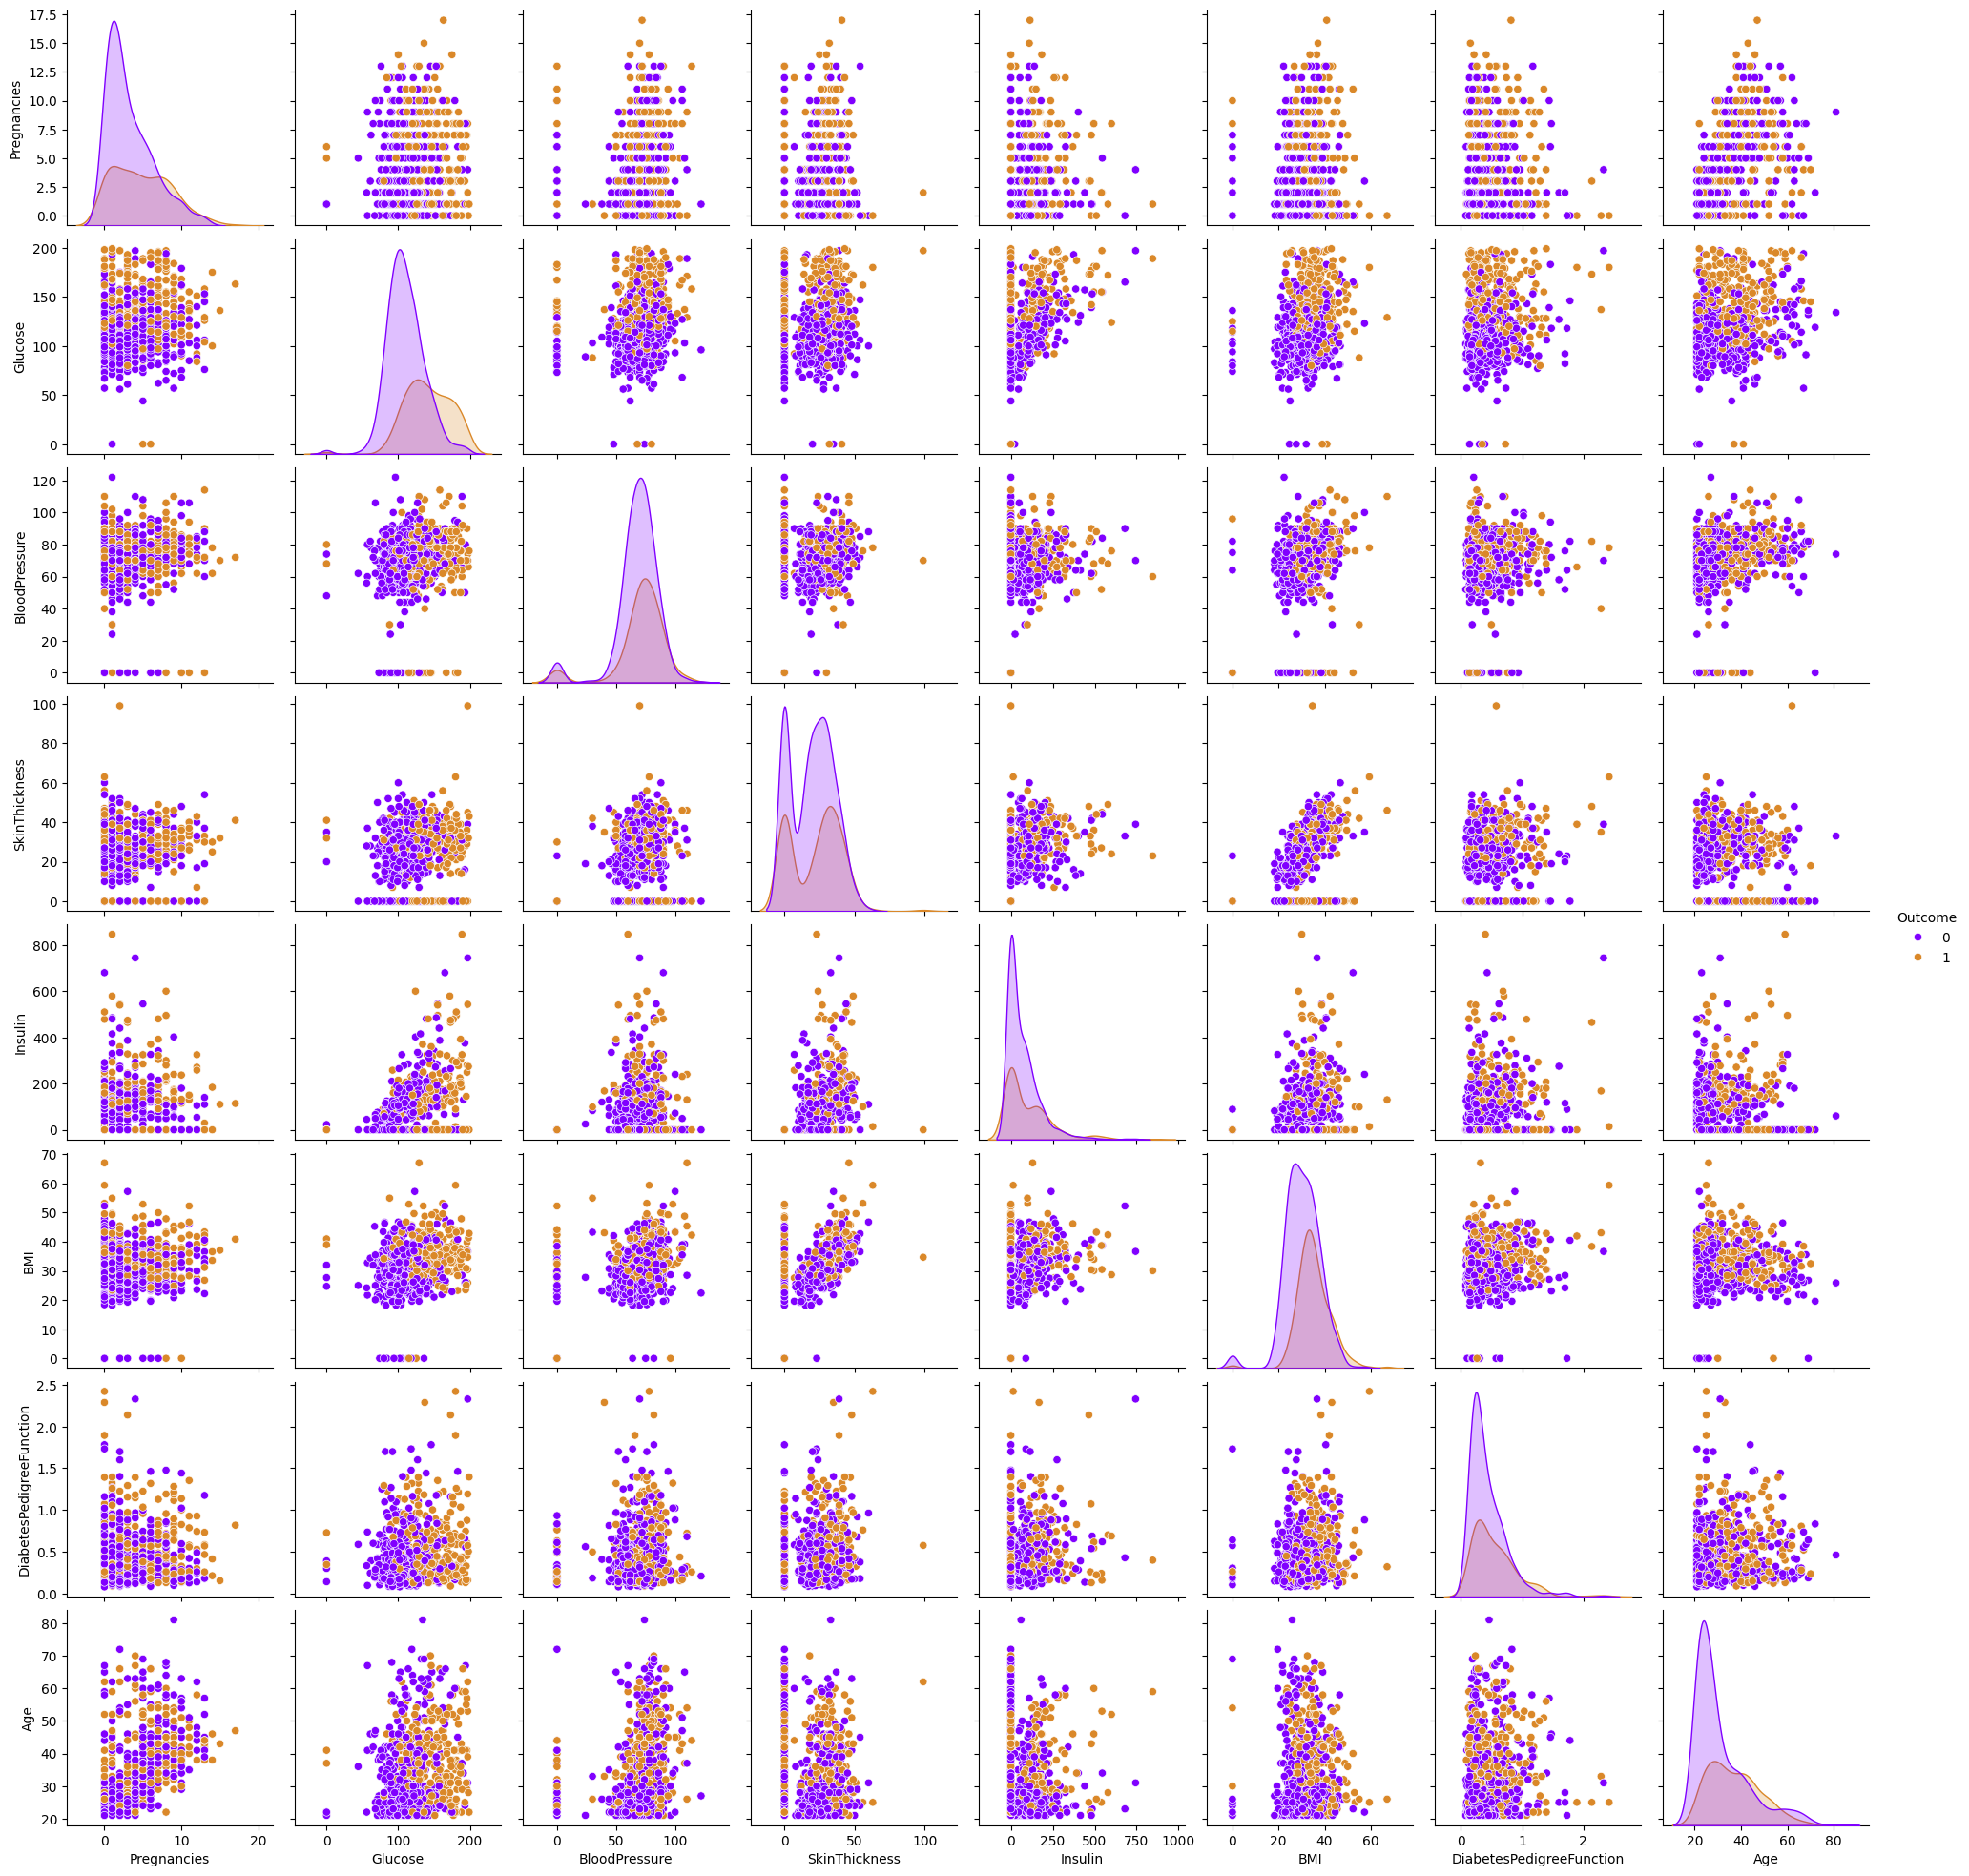

In [9]:
sns.pairplot(data=diabetes_dataset,hue='Outcome',palette=["#8000ff","#da8829"])
plt.show()

<Axes: >

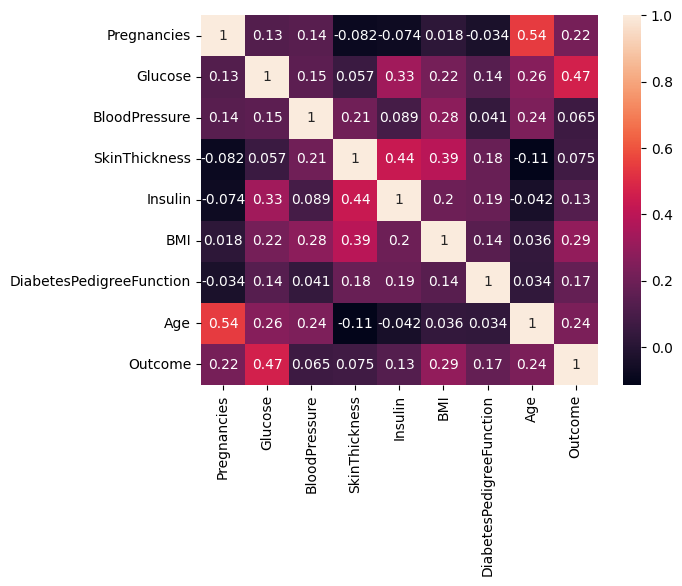

In [10]:
corrmat=diabetes_dataset.corr()
sns.heatmap(corrmat, annot=True)

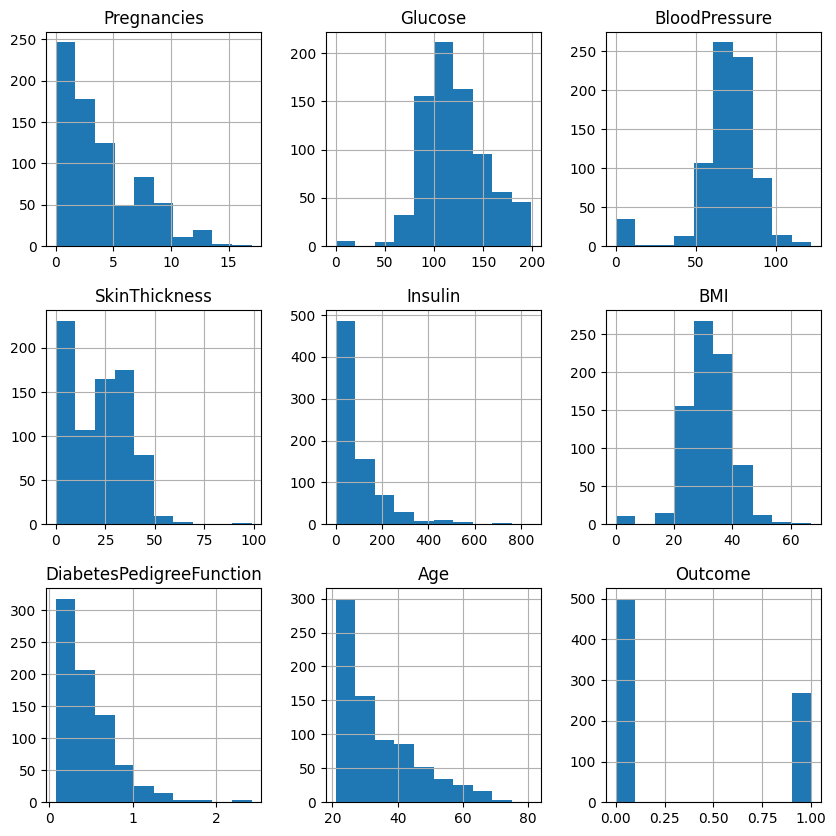

In [11]:
#histogram for each  feature
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

In [12]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
x=diabetes_dataset.iloc[:,:-1]
y=diabetes_dataset["Outcome"]

#### Data standardization

In [14]:
scalar=StandardScaler()

In [15]:
scalar.fit(x)

StandardScaler()

In [16]:
standardized_data=scalar.transform(x)

In [17]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
x=standardized_data
y=diabetes_dataset["Outcome"]

#### Train Test split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [20]:
classifier=svm.SVC(kernel='linear')

In [21]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
# Direct Prediction
pr=classifier.predict([[6,148,72,35,0,33.6,0.627,50]])
print(pr)

[1]


In [23]:
classifier.score(x_train,y_train)

0.7866449511400652

In [24]:
classifier.score(x_test,y_test)

0.7727272727272727

In [25]:
input_data=(6,148,72,35,0,33.6,0.627,50)

#changing the input data to numpy array
input_data_np=np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped=input_data_np.reshape(1,-1)

#Standardizing the input data
std_data=scalar.transform(input_data_reshaped)
print(std_data)

#prediction
cf=classifier.predict(std_data)
print(cf)


if (cf[0]==0):
    print("The person in not diabetic")
else:
    print("The person is diabetic")

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The person is diabetic


c:\Users\ARHAAN ARIF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
